In [147]:
# Initialize Otter
import otter
grader = otter.Notebook("lab03_homophily.ipynb")

In [148]:
!pip install --upgrade networkx

In [149]:
from IPython.core.display import HTML
HTML("""
<style>
.imagesource {
    font-size: xx-small;
}
</style>
""")

from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

import os
import networkx as nx

def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()


## Lab 3 - Node Attributes and Homophily

## Node Attributes

We have seen that there is a lot we can learn about social networks by just studying their structure---i.e., by investigating the patterns of nodes and edges. However, since social networks are typically made of people, we know that only studying their structure leaves a lot of potentially important information out of our analysis. People are not all the same, and so reducing people to identical nodes in a network can be too simplistic to accurately learn about the social processes that a network is a part of.

Today, we're going to learn how to enrich our networks by adding additional information about who is in the nodes. We'll continue to work with the theoretical idea of homophily, which we have discussed in a few previous classes.

## Measuring homophily

In class, we talked about one approach to measuring homophily in a network that is composed of nodes that are either girls or boys.

Suppose that a proportion $p$ of the nodes in the network are boys, and that a proportion $q$ of nodes in the network are girls. Then we reasoned that if we pick an edge at random from the network, and randomly assign genders to the nodes at either end of the edge, we'd see one of the following three situations:

<img src='random_gender_withfrac.jpg' width='30%'></img>

We'd expect to see an edge joining two boys with probability $p^2$; an edge joining two girls with probability $q^2$; and an edge that joins a boy and a girl with probability $pq + qp = 2p$. 

Although this analysis is a good starting point, it makes an important assumption: it assumes that, on average, boys and girls have the same average network size. (If you are curious about why the model implies this, please see the optional footnote at the end of the lab.)

In this lab, we'll explore a more sophisticated metric -- **the assortativity coefficient** -- that accounts for differences in nodes' network sizes. The assortativity coefficient can also be extended to measure homophily on characteristics that have more than two categories.

### The assortativity coefficient

If a network's nodes can be divided into discrete groups, then a quantitative metric for the amount of homophily in a network was proposed by [Newman](https://arxiv.org/pdf/cond-mat/0205405.pdf). We'll work with this metric today.

* suppose that the nodes can all be divided into discrete groups
* let $a_i$ be the fraction of ends of edges ('stubs') in a network that are connected to nodes in group $i$
* let $e_{ij}$ be the fraction of edges in a network ('stubs') that connect nodes in group $i$ to nodes in group $j$


Newman's *assortativity coefficient* is:

$$r = \frac{\sum_i e_{ii} - \sum_i a_i^2}{1 - \sum_i a_i^2}$$

* when $r=0$, then there is no assortativity
* when $r>0$, then there is assortativity -- i.e., members of the same group tend to be more connected to each other than to other groups. At the extreme, when $r=1$, all network connections are within groups
* when $r<0$, then there is disassortativity -- i.e., members of the same group are less likely to be connected to each other than to other groups

For two groups, we can write the assortativity coefficient as

$$r = \frac{e_{11} + e_{22} - a_1^2 - a_2^2}{1 - a_1^2 - a_2^2}$$

### Example 1

<img src='example_network_groups3.png'></img>

**Practice** Calculate the assortativity coefficient in the example network. You can find answers to this practice question at the end of the notebook.

```
          degree  group
  node 1    1     blue
  node 2    2     red
  node 3    5     blue
  node 4    1     red
  node 5    2     blue
  node 6    1     red
  node 7    2     red
  node 8    2     blue
```

Stub Counts:

```
        blue  red
  blue   4     6
  red    6     0
```

Stub Totals:

```
        total degree  a_i
  blue       10       10/16
  red        6        6/16
```

$e_{ij}$ MATRIX:
    
```
        blue  red
  blue  4/16  6/16
  red   6/16  0/16
```

Assortativity Coefficient $r = \frac{e_{11} + e_{22} - a_1^2 - a_2^2}{1 - a_1^2 - a_2^2}$

_**r = assortativity coefficient<br>
e11 = like to like<br>
e22 = other like to like<br>
a1 = sum of first column<be>
a2 = sum of second column**_

**ANSWER:** *assortativity coefficient*
$r$ = [((4/16) + 0) - (10/16)^2 - (6/16)^2] / [1 - (10/16)^2 - (6/16)^2] = -0.6

 Now we'll use the `networkx` package to check the results of the calculation we performed above. This will  give us a chance to learn about how the package handles node attributes.

## Question 1: 

Create a `networkx` graph called `test` that represents the example network above.<BR>
    
*[Hint: you can enter this network as an edgelist.]*
    
*[Hint: you can go back to lab 2 and see how to create a networkx graph.]*

In [150]:
edge_list = [
    (1, 3),
    (3, 4),
    (3, 2),
    (3, 7),
    (3, 8),
    (7, 8),
    (2, 5),
    (5, 6)
]
test = nx.Graph(edge_list)

In [151]:
grader.check("q1")

q1 results: All test cases passed!

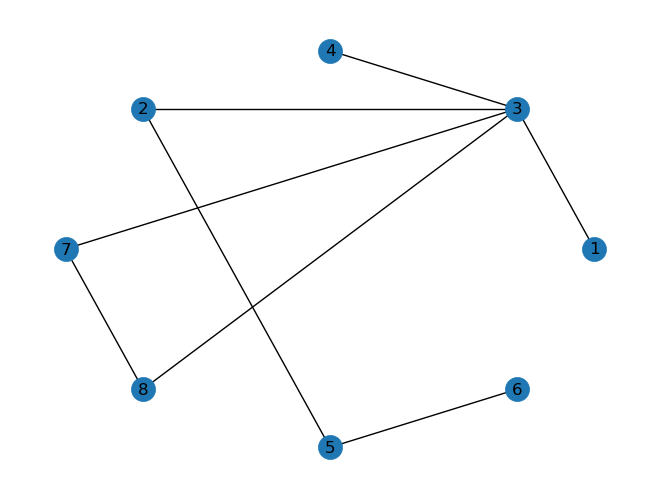

In [152]:
# Let's take a look at the network you generate, is it the same as the one above?
nx.draw_circular(test, with_labels=True)

The pattern below shows us how to tell `networkx` that there is a node attribute called 'color', and it shows us how to explicitly add the color of each node:

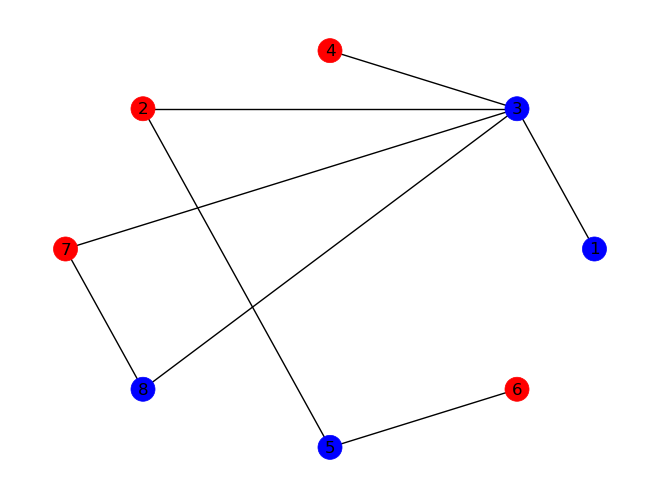

In [153]:
nx.set_node_attributes(test,                    
                       {1 : 'blue',
                        2 : 'red',
                        3 : 'blue',
                        4 : 'red',
                        5 : 'blue',
                        6 : 'red',
                        7 : 'red',
                        8 : 'blue'},
                      'color')

node_color=[x[0] for x in nx.get_node_attributes(test, 'color').values()]

nx.draw_circular(test, with_labels=True,node_color=node_color)

See the help page for [`set_node_attributes`](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.classes.function.set_node_attributes.html) for more information on working with attributes.

You can check the matrix of $e_{ij}$ values by using the function `nx.attribute_mixing_matrix`:

In [154]:
nx.attribute_mixing_matrix(test, 'color')

array([[ 0.25 ,  0.375],
       [ 0.375,  0.   ]])

Note that, by default, the order of the columns of the mixing matrix is not specified. If you want to be able to interpret the columns, you can pass in a dictionary that maps the different attributes to column numbers like we do below:

In [155]:
nx.attribute_mixing_matrix(test, 'color', mapping = {'red' : 1, 'blue' : 0})

array([[ 0.25 ,  0.375],
       [ 0.375,  0.   ]])

We can calculate the value of the assortativity coefficient using the `nx.attribute_assortativity_coefficient` function:

In [156]:
nx.attribute_assortativity_coefficient(test, 'color')

-0.6

## For the following questions, use the below example network. 

Does it look more or less homophilous by color than the one above?

<img src='example_network_groups2.png'></img>

<!-- BEGIN QUESTION -->

## Question 2:

Calculate the assortativity coefficient for this network by filling in the missing quantities below:

```
          degree  group
  node 1    1      blue
  node 2    2      red
  node 3    5      blue
  node 4    1      blue
  node 5    2      red
  node 6    1      red
  node 7    2      blue
  node 8    2      blue
```

STUB COUNTS:
```

        blue  red
  blue   10    1
  red    1     4
```

STUB TOTALS: 
```

        total degree  a_i
  blue       11      11/16
  red        5        5/16
```

$e_{ij}$ MATRIX:
```

       blue  red
 blue  10/16  1/16
 red   1/16   4/16
```

<!-- END QUESTION -->

## Question 3: 

Calculate (by hand) the *assortativity coefficient* of this network and assign it to `q3`.

In [157]:
q3 = ((10/16) + (4/16) - ((11/16)**2) - ((5/16)**2)) / (1 - ((11/16)**2) - ((5/16)**2))
q3

0.7090909090909091

In [158]:
grader.check("q3")

q3 results: All test cases passed!

## Question 4: 

Now check your answer using the `networkx` package. Build a networkx graph called `test2` first, and then assign the color attributes to the nodes, and finally use the functions to calculate the assortativity coefficient.

In [159]:
# Create test2 network graph
test2 = nx.Graph([(1,3), (2,3), (2,5), (3,4), (3,7), (3,8), (5,6), (7,8)])

nx.set_node_attributes(test2, {
                        1: 'blue',
                        2: 'red',
                        3: 'blue',
                        4: 'blue',
                        5: 'red',
                        6: 'red',
                        7: 'blue',
                        8: 'blue',
                    },'color')

# Get the assortativity coefficient
q4 = nx.attribute_assortativity_coefficient(test2, "color")
q4

0.7090909090909091

In [160]:
grader.check("q4")

q4 results: All test cases passed!

### Reading Add Health attributes

Recall that the Add Health dataset we have been working with stores information about network connections in an edge list.  The Add Health dataset also has information about the nodes; it has their grade, their gender, and their race/ethnicity. The code below will read all of this information in for you.

There are some problems with two of the Add Health networks' node data, so we'll leave those two out. Our set of Add Health networks is thus 82 nodes instead of 84 for today.

(Note-- no action is required for the below code cell, simply run it)

In [161]:
data_path = "data/"

def read_add_health_edges(network_id, path=data_path):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join(path, "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

def read_add_health_attributes_oneperrow(network_id, net, path=data_path):
    """
    Read in an Add Health attributes file that has one attribute per row
    """
    att_file = os.path.join(path, "comm" + str(network_id) + "_att.dat")
    with open(att_file, 'r') as f:
        att_lines = f.readlines()
    
    # the first 8 lines are meta-info and not actual data
    att_lines = att_lines[8:]
    
    node_races = {}
    node_grades = {}
    node_sexes = {}

    for cur_id in net.nodes():
        
        print("starting node ", cur_id)
        
        # the attributes are stored one per line for each node in sequence (race / sex / grade)
        # so line 0 is node 1's race, line 2 is node 1's sex, line 3 is node 1's grade, line 4 is node 2's race, etc
        start_idx = (cur_id-1) * 3
        this_race = str.split(g_att[start_idx])[2]
        this_sex = str.split(g_att[start_idx+1])[2]
        this_grade = str.split(g_att[start_idx+2])[2]
    
        node_races[cur_id] = this_race
        node_grades[cur_id] = this_grade
        node_sexes[cur_id] = this_sex
    
    nx.set_node_attributes(net, 'race', node_races)
    nx.set_node_attributes(net, 'grade', node_grades)
    nx.set_node_attributes(net, 'sex', node_sexes)
    
    return(net)

def read_add_health_attributes(network_id, net, path=data_path):
    """
    Read in an Add Health attributes file that has one row per node
    """
    
    # open up the attributes datafile
    att_file = os.path.join(path, "comm" + str(network_id) + "_att.dat")
    with open(att_file, 'r') as f:
        att_lines = f.readlines()
        
    # the first several lines are meta-info and not actual data;
    # the data start once we see "DATA:\n"
    header_start = att_lines.index("COLUMN LABELS:\n") + 1
    header_end = att_lines.index("DATA:\n")
    data_start = header_end + 1
    
    # build up a list that maps column index to column name
    col_defs = []
    # build up a dict that has the data for each variable
    col_data = {}
    
    for colindex, lineidx in enumerate(range(header_start, header_end)):
        # strip off the newline and the starting/ending quotes of the column name
        this_name = (str.strip(att_lines[lineidx])[1:-1]).lower()
        col_defs.append(this_name)
        # initialize the data for this column to empty dict
        col_data[this_name] = {}  
    
    att_lines = att_lines[data_start:]
    
    # for each row (corresponding to one node's data)
    # split the columns up and stick them into the appropriate
    # dict, with node id as key and attribute value as value
    for cur_id in net.nodes():
        #print('starting node ', cur_id)
        these_data = str.split(att_lines[cur_id - 1])
        
        for colidx, dat in enumerate(these_data):
            col_data[col_defs[colidx]][cur_id] = dat

    # take the data and assign it to the nodes in the graph object
    for var in col_defs:
        nx.set_node_attributes(net,  col_data[var],var)
    
    return(net)

def read_add_health_network(network_id):
    
    this_net = read_add_health_edges(network_id)
    #this_net = read_add_health_attributes(network_id, this_net)
    this_net = read_add_health_attributes(network_id, this_net)
    
    return(this_net)

Having loaded those functions, we can use the `read_add_health_network` function to load the datasets into memory:

In [162]:
# EXCEPTIONS: networks 1 and 48 have formatting problems, so we'll omit them today
# this will take a few seconds

add_health_ids = [x for x in range(2, 85) if x != 48]
add_health_networks = [read_add_health_network(x) for x in add_health_ids]

### Exploring network attributes

We'll start by looking at the fraction of students in one school that is male.

Looking at the [dataset information](http://moreno.ss.uci.edu/data.html#adhealth), you can see that the Add Health sex variable has the values 1=male, 2=female, and 0=unreported.

**Practice** Use the `get_node_attributes` function to grab the sexes of the students in the first school by filling in the code below.

In [163]:
net = add_health_networks[0]
sexes = nx.get_node_attributes(net, 'sex')
sexes

{1: '2',
 95: '2',
 108: '2',
 2: '1',
 30: '1',
 85: '1',
 3: '2',
 10: '1',
 21: '2',
 75: '2',
 81: '2',
 82: '2',
 6: '1',
 15: '2',
 36: '1',
 37: '1',
 59: '1',
 84: '2',
 7: '2',
 11: '2',
 29: '1',
 33: '1',
 48: '2',
 72: '2',
 79: '2',
 96: '1',
 8: '1',
 26: '2',
 60: '1',
 74: '1',
 97: '1',
 103: '2',
 9: '1',
 34: '1',
 41: '1',
 12: '1',
 24: '1',
 28: '2',
 78: '1',
 98: '2',
 13: '1',
 31: '2',
 35: '1',
 67: '2',
 68: '1',
 100: '1',
 104: '1',
 109: '2',
 14: '1',
 18: '2',
 71: '2',
 105: '2',
 107: '1',
 17: '1',
 19: '1',
 66: '1',
 101: '2',
 106: '1',
 20: '1',
 57: '1',
 22: '1',
 49: '1',
 86: '1',
 44: '1',
 51: '2',
 76: '2',
 25: '2',
 45: '2',
 27: '1',
 61: '1',
 42: '1',
 91: '1',
 58: '2',
 32: '1',
 55: '2',
 89: '1',
 83: '1',
 5: '1',
 64: '1',
 63: '1',
 39: '2',
 90: '2',
 102: '2',
 40: '2',
 99: '1',
 46: '1',
 4: '1',
 47: '1',
 88: '2',
 87: '1',
 50: '1',
 52: '2',
 77: '2',
 54: '1',
 62: '1',
 56: '1',
 16: '1',
 65: '2',
 73: '2',
 70: '1',

It turns out that the `get_node_attributes` function returns a dictionary, but we will find it easier to work with `numpy` arrays. To convert the dictionary values into an array, use the following code:

In [164]:
sexes_array = np.array(list(sexes.values()))
sexes_array

array(['2', '2', '2', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1',
       '2', '1', '1', '1', '2', '2', '2', '1', '1', '2', '2', '2', '1',
       '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1',
       '2', '1', '2', '1', '2', '1', '1', '1', '2', '1', '2', '2', '2',
       '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2',
       '2', '2', '2', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1',
       '1', '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '1', '1',
       '2', '2', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '2'],
      dtype='<U1')

## Question 5: 
Calculate the proportion of students in the first school that is male.

Hint: You can use `np.mean()`

In [165]:
q5 = np.count_nonzero(sexes_array == '1')/len(sexes_array)
q5

0.6

In [166]:
grader.check("q5")

q5 results: All test cases passed!

**Practice** Now write a loop that calculates the fraction of students that is male in each of the Add Health schools. Store your results in an array called `add_health_frac_male`.

In [167]:
# create an empty array first.
add_health_frac_male = make_array()

# Then we calculate the fractions and use the for loop to accumulate the records for each network.
for net in add_health_networks:
    sexes = nx.get_node_attributes(net, 'sex').values()
    sexes = np.array(list(sexes))
    net_male_frac = np.mean(sexes == '1')
    add_health_frac_male = np.append(add_health_frac_male, net_male_frac)
    
add_health_frac_male

array([ 0.6       ,  0.5       ,  0.44839858,  0.50955414,  0.49074074,
        0.47619048,  0.50490196,  0.49193548,  0.48082596,  0.47201946,
        0.52495697,  0.46636086,  0.49644128,  0.49717514,  0.50257069,
        0.46962233,  0.51760563,  0.51422764,  0.48791209,  0.46419098,
        0.5228013 ,  0.53973013,  0.47362251,  0.48370927,  0.45735027,
        0.99657827,  0.49472759,  0.48681898,  0.5       ,  0.57256991,
        0.48538012,  0.47710116,  0.45737399,  0.44653349,  0.48885794,
        0.35656836,  0.48944338,  0.46720484,  0.51148851,  0.44525194,
        0.42288557,  0.4683313 ,  0.49866903,  0.49038462,  0.51152074,
        0.49543147,  0.49681529,  0.48247341,  0.50073206,  0.40046431,
        0.46815835,  0.44956772,  0.44642857,  0.47309417,  0.47275775,
        0.49737609,  0.4625641 ,  0.47944007,  0.4865175 ,  0.49000951,
        0.47959184,  0.48706897,  0.44007156,  0.50776398,  0.44517544,
        0.46087581,  0.46024636,  0.47368421,  0.45945946,  0.58

**Practice** Make a histogram that shows the distribution of the fraction male across the schools in the sample.

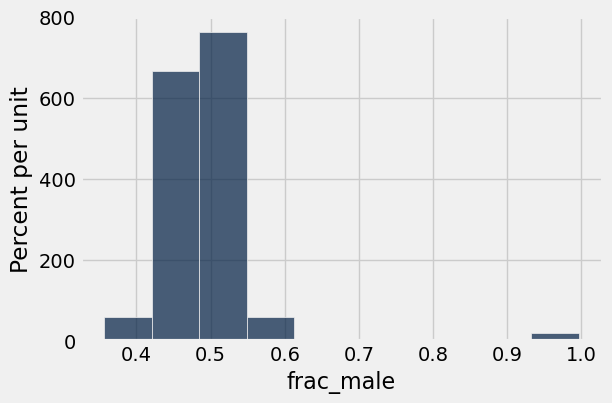

In [168]:
Table().with_column('frac_male', add_health_frac_male).hist()

## Question 6:

Following the pattern you used to calculate the fraction male in each community, write another loop that calculates the assortativity coefficient for sex in each community. Store your results in an array called `add_health_r`.

In [169]:
add_health_r = make_array()

for net in add_health_networks:
    net_r = nx.attribute_assortativity_coefficient(net, 'sex')
    add_health_r = np.append(add_health_r, net_r)
    
add_health_r

array([ 0.14207465,  0.09632572,  0.05316426,  0.03781604,  0.09492771,
        0.15066857,  0.08683557,  0.10945906,  0.16117832,  0.10985689,
        0.06401593,  0.17960147,  0.07686842,  0.14533151,  0.07817275,
        0.08788648,  0.05508658,  0.08292628,  0.13782239,  0.16076421,
        0.18349129,  0.08789731,  0.12913338,  0.12408234,  0.14120606,
       -0.00237922,  0.13783791,  0.13717341,  0.15202205,  0.30815379,
        0.1406675 ,  0.13768224,  0.07269015,  0.1439017 ,  0.09950581,
        0.11881835,  0.13886652,  0.1056683 ,  0.10287037,  0.09577148,
        0.08751284,  0.11453051,  0.11292649,  0.09841272,  0.0833842 ,
        0.09719308,  0.15611561,  0.10838692,  0.16687752,  0.09892444,
        0.14685605,  0.1667231 ,  0.27855351,  0.20528251,  0.1144674 ,
        0.15651848,  0.16315856,  0.12861718,  0.22189027,  0.26624663,
        0.13862468,  0.12229252,  0.10872317,  0.10800383,  0.2562249 ,
        0.14127244,  0.09238042, -0.01217532,  0.14761905,  0.12

In [170]:
grader.check("q6")

q6 results: All test cases passed!

**Practice** Plot a histogram of the assortativity coefficients across the Add Health networks.

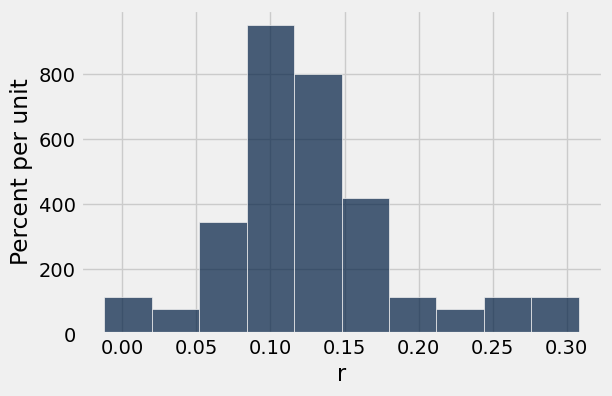

In [171]:
Table().with_columns('r', add_health_r).hist()

### Generating random networks with random sexes

This histogram of assortativity coefficients you just made shows the values that assortativity takes on across all of the different school networks. It seems to suggest that, across all of these networks, the assortativity coefficient for sex tends to be positive.

Now let's take a deeper dive, focusin on a specific Add Health network:

In [172]:
first_add_health = add_health_networks[0]

We'll now go through an analysis to try to assess more rigorously whether or not there is evidence for homophily by sex in this network.

## Question 7:

Calculate the assortativity coefficient for sex in `first_add_health`.

In [173]:
q7 = nx.attribute_assortativity_coefficient(first_add_health, 'sex')
q7

0.1420746545679521

In [174]:
grader.check("q7")

q7 results: All test cases passed!

We're interested in understanding whether or not there is homophily according to sex in this specific network. The assortativity coefficient is positive, which suggests that there is evidence in favor of homophily. However, we're in a similar situation to the example we saw in lecture: it seems possible that, actually, there is no homophily by sex in this network; rather, the network is assembled as the result of a random process and, just by chance, we happened to get a network that had a positive assortativity coefficient.

To assess how likely this possibility is, we will set up a *null model* and to compare what we see in the real world to what we would see if the null model were true. Remember that a null model describes the world in the absence of the phenomenon we are interested in; here, it describes a world in which networks are formed without any homophily by sex. The first_add_health network would be the observed network.

For this null model, we will assume that the network structure is fixed, but that the gender of each node is randomly assigned. (Another way of saying this is that we *condition on* the observed network structure.)

We'd like to know what the distribution of assortativity coefficients would look like under this null model. Then we can see how likely (or unlikely) the observed assortativity coefficient would be if the null model were true.

In [175]:
import random

def shuffle_attribute(net, att): # the two inputs are: the network, and the attribute we work with
    att_dict = nx.get_node_attributes(net, att) # get the dictionary of the network
    
    # we want a new copy of the network (we don't want to clobber the original one)
    newnet = net.copy()
    
    # create a dictionary mapping node id to shuffled attribute values
    node_ids = att_dict.keys()
    att_vals = list(att_dict.values())
    random.shuffle(att_vals)
    
    new_att = dict(zip(node_ids, att_vals)) # create the new dictionary
    
    # assign the newly shuffled attribute values
    nx.set_node_attributes(newnet, name=att, values=new_att)
    
    return(newnet)

In [176]:
### If you have trouble understanding the function above, you can run the following codes and see what they do
dictionary = nx.get_node_attributes(test2, 'color')
dictionary

{1: 'blue',
 3: 'blue',
 2: 'red',
 5: 'red',
 4: 'blue',
 7: 'blue',
 8: 'blue',
 6: 'red'}

In [177]:
dictionary.keys()

dict_keys([1, 3, 2, 5, 4, 7, 8, 6])

In [178]:
list(dictionary.values())

['blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red']

If you run the following cell a few times, you should see that the sex value is getting shuffled

In [179]:
test_3 = shuffle_attribute(first_add_health, 'sex')
test_3.nodes[1]['sex']

'1'

# Question 8:

Fill in the code below to reshuffle sex in the `first_add_health` network 1000 times. Record the assortativity coefficient for each reshuffled network.

In [180]:
# Hint: use the correct index
first_add_health = add_health_networks[0]

null_network_r = make_array()

for _ in range(1000):
    # shuffle the sex for the current network
    cur_net = shuffle_attribute(first_add_health, 'sex')
    # record the coefficient of the shuffled current network by appending it to the array
    null_network_r = np.append(null_network_r, nx.attribute_assortativity_coefficient(cur_net, 'sex'))

#print(len(null_network_r))
print(null_network_r)

[ -4.31654676e-03  -2.87265676e-02  -9.07605581e-03  -8.31940964e-03
  -1.76029058e-02  -5.40268456e-02  -2.22013942e-02   1.43961232e-02
   4.83155259e-02  -1.29198512e-02   1.45267742e-02  -4.27570575e-02
   1.67909642e-02   3.61778514e-02   7.36910149e-03  -2.87356322e-03
  -8.12099694e-02   4.47849304e-02   4.38356164e-02   7.63960260e-03
  -4.69476526e-02   3.70152934e-02   1.24081395e-02   3.53979354e-02
  -6.07991805e-02  -2.51976676e-02  -8.57252101e-02   9.67673421e-03
  -4.52195836e-02  -1.63975942e-02   1.30917470e-02  -1.06870824e-01
  -1.08748778e-01  -1.61323387e-03  -3.82691007e-02   1.48074011e-02
  -1.00952331e-02   4.22975848e-03   1.08644308e-02   1.42381312e-02
   1.48074011e-02   5.14366923e-02  -1.09947989e-02  -4.26203701e-02
  -1.40895718e-01  -1.18381800e-01   8.46149095e-03  -9.02464422e-02
   4.21222849e-02  -8.54066986e-02  -4.32935623e-02  -8.72274143e-02
  -3.73029655e-02   5.50300140e-02   4.72704961e-03  -4.40206054e-03
  -2.74635152e-02  -1.38414217e-02

In [181]:
grader.check("q8")

q8 results: All test cases passed!

**Practice** Make a histogram of the `null_network_r` values. Identify value is the assortativity coefficient centered on.

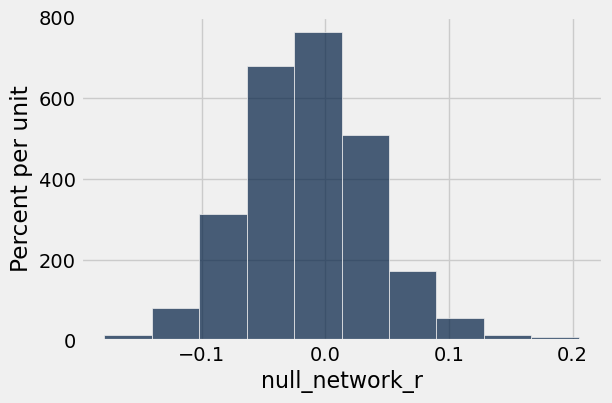

In [182]:
to_hist = Table().with_column('null_network_r', null_network_r)
to_hist.hist()

# Question 9: 

Now calculate the assortativity coefficient for the observed network (the first Add Health network) that you based the random networks on. Call this `observed_r`.

In [183]:
observed_r = nx.attribute_assortativity_coefficient(first_add_health, 'sex')
observed_r

0.1420746545679521

In [184]:
grader.check("q9")

q9 results: All test cases passed!

<!-- BEGIN QUESTION -->

# Question 10:

Where in the null distribution does the observed assortativity coefficient fall? What does this suggest about how likely the observed value is to have been generated from the null model?

_**The observed assortativity coefficient falls far to the right of the null distribution. This suggest that the observed value is highly unlikely to have been thanks to chance alone.**_

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Question 11:
We will base our null hypothesis on the null model. In words, describe what the null hypothesis should say about the network.<BR>

_The null hypothesis should state something like: **There is no significant evidence of homophily in the Add Health networks.**_

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Question 12:
We will base our alternative hypothesis on the observed model (Add Health), in words, describe what the alternative hypothesis says about the network.

_The alternativce hypothesis should state something like: **There is significant evidence of homphily in the Add Health networks.**_

<!-- END QUESTION -->

**Practice** Now calculate an empirical $p$ value based on your null and alternative hypotheses.

In [185]:
emp_p_value = np.mean(null_network_r >= observed_r)
emp_p_value

0.0060000000000000001

<!-- BEGIN QUESTION -->

# Question 13:
What do you conclude about homophily by sex in this network from the empirical $p$ value above, assuming significance level is at the conventional 0.05?

_**A p-value of 0.001 is much below the 0.05 significance level, demonstrating that there is significant evidence of homphily in the Add Health networks.**_

<!-- END QUESTION -->

### Optional footnote

To see why the simple null model we discussed in lecture implies that the average degree of girls and boys is the same, let's start by recalling that the average degree among girls can be written as

$$
\text{avg. degree among girls} = \frac{\text{sum of girls' degrees}}{\text{number of girls}}
$$

and a similar expression holds for the average degree among boys.

Now let's think about how much each of the three types of edges (b-b, b-g, and g-g) will add to the total degrees:

| edge type | probability | added to boys' total degree | added to girls' total degree |
|-----------|-------------| -----------------|---------------------------|
| b-b | $p^2$ |  2 | 0 |
| b-g | $2pq$ | 1 | 1 |
| g-g | $q^2$  | 0 | 2 |

Using the table above, we can determine the expected total degree of girls under this model: if we draw $k$ degrees in total, then we expect $q^2 k$ g-g edges and $2pq k$ g-b edges. So we have

$$
\text{expected total girls' degree} = 2 q^2 k + 2pqk = 2qk(q + p) = 2qk.
$$

The last step follows because $q = 1-p$, so that $q+p = 1$.
To calculate, the average degree among girls, we need to divide this total degree by the number of girls. If there are $N$ people in the population, then we expect $Nq$ to be girls (since $q$ is the proportion of the population that is girls). So this means

$$
\text{expected avg. degree among girls} = \frac{2qk}{Nq} = \frac{2k}{N}.
$$


Using the same logic, we can determine that 

$$
\text{expected total boys' degree} = 2 p^2 k + 2pqk = 2pk(q + p) = 2pk.
$$

and so

$$
\text{expected avg. degree among boys} = \frac{2pk}{Np} = \frac{2k}{N}.
$$

This is the same as the expected average degree among girls.


### Answer to Practice Question

```
          degree  group
  node 1    1     blue
  node 2    2     red
  node 3    5     blue
  node 4    1     red
  node 5    2     blue
  node 6    1     red
  node 7    2     red
  node 8    2     blue
```

Stub Counts:

```
        blue  red
  blue   4     6
  red    6     0
```

Stub Totals:

```
        total degree  a_i
  blue       10       10/16
  red        6        6/16
```

$e_{ij}$ MATRIX:
    
```
        blue  red
  blue  4/16  6/16
  red   6/16  0
```

**ANSWER:** assortativity coefficient  𝑟  = [((4/16) + 0) - (10/16)^2 - (6/16)^2] / [1 - (10/16)^2 - (6/16)^2] = -0.6

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [186]:
grader.check_all()

q1 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please upload the .zip file to Gradescope.

In [187]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!
